#What was the world saying the morning after the Nov. 13th, 2015 attacks in Paris? 

In the fall of 2015, I happened to be living in France for several months. I was also starting to learn Python, and was teaching myself how to handle Twitter data using many excellent online tutorials. I had learned how to build a listener already, so when I woke up to the awful news of the Paris attacks on the morning of November 14th, I gathered tweets with the hashtags:
            
            #ParisAttacks, #Paris, #NousSommesUnis

The code below is me exploring the data and doing a very simple sentiment analysis on it. 

##Authorization from Twitter and streaming code is separate

In [1]:
# authorization_streaming_filter.ipynb

#Preparing the data before importing into Python
##I used RE in Unix to remove the rate limit exception flags from the Twitter streamed files

    $ sed '/^{"limit":{"track"*/d' 2015-11-14copy2.json > 2015-11-14.json

#Import Libraries & Identify Data Path

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from textblob import TextBlob
from os import path
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words
from scipy.misc import imread

tweets_data_path = '2015-11-14.json'

Here are a couple of the amazing sources I used to learn how to handle Twitter data:

http://adilmoujahid.com/posts/2014/07/twitter-analytics/ 

https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/ #check out several related posts on this blog

#Simple text processing using TextBlob

In [2]:
tweets_data = []
messageTB = []
polarity = []
sentiment = []
subjectivity = []

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
    #Load Data
        tweet = json.loads(line)
        tweets_data.append(tweet)
    
    #Create TextBlob
        tweet_text = TextBlob(tweet['text'])
        messageTB.append(tweet_text)
    
    #Calculate polarity of sentiment
        polarity_txt = tweet_text.sentiment.polarity
        polarity.append(polarity_txt)     
        
    #Determine if sentiment is positive, negative, or neutral
        if tweet_text.sentiment.polarity < 0:
            sentiment_txt = "negative"
            sentiment.append(sentiment_txt)
        elif tweet_text.sentiment.polarity == 0:
            sentiment_txt = "neutral"
            sentiment.append(sentiment_txt)
        else:
            sentiment_txt = "positive"
            sentiment.append(sentiment_txt)
    
    #Calculate subjectivity
        subjectivity_txt = tweet_text.sentiment.subjectivity
        subjectivity.append(subjectivity_txt)
    
    except:
        continue
    
print len(tweets_data)

#As a test, remove hashtag below and print one of the new lists (e.g. subjectivity):
#print subjectivity

190393


#Create a Pandas DataFrame:

In [3]:
tweets = pd.DataFrame()

tweets['user_name'] = map(lambda tweet: tweet['user']['name'], tweets_data)
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['place_name'] = map(lambda tweet: tweet['place']['name'] if tweet['place'] != None else None, tweets_data)
tweets['full_name'] = map(lambda tweet: tweet['place']['full_name'] if tweet['place'] != None else None, tweets_data)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], tweets_data)
tweets['created_at'] = map(lambda tweet: tweet['created_at'], tweets_data)
tweets['coordinates'] = map(lambda tweet: tweet['place']['bounding_box']['coordinates'][0] if tweet['place'] != None else None, tweets_data)
tweets['messageTB'] = messageTB
tweets['polarity'] = polarity
tweets['sentiment'] = sentiment
tweets['subjectivity'] = subjectivity

tweets.head()

,user_name,text,lang,country,place_name,full_name,time_zone,created_at,coordinates,messageTB,polarity,sentiment,subjectivity
0,Philippe Jacqué,RT @elise_vincent: Les vidéos amateurs des #at...,fr,None,None,None,None,Sat Nov 14 08:03:11 +0000 2015,None,"(R, T, , @, e, l, i, s, e, _, v, i, n, c, e, ...",0,neutral,0
1,Smiley girl,RT @jayeshdewana12: #ParisAttacks #Paris #Pari...,und,None,None,None,Pacific Time (US & Canada),Sat Nov 14 08:03:11 +0000 2015,None,"(R, T, , @, j, a, y, e, s, h, d, e, w, a, n, ...",0,neutral,0
2,Raine LaChance,RT @nayeem1211: With peace and prayers! #Porte...,en,None,None,None,None,Sat Nov 14 08:03:11 +0000 2015,None,"(R, T, , @, n, a, y, e, e, m, 1, 2, 1, 1, :, ...",0,neutral,0
3,sophie leray,RT @fadig: From #Beirut to #Paris شمعة للحياة...,ar,None,None,None,Abu Dhabi,Sat Nov 14 08:03:11 +0000 2015,None,"(R, T, , @, f, a, d, i, g, :, , F, r, o, m, ...",0,neutral,0
4,15,on fini l'année comme on l'a commencer #prayfo...,fr,France,Auxonne,"Auxonne, Bourgogne",None,Sat Nov 14 08:03:11 +0000 2015,"[[5.354657, 47.146161], [5.354657, 47.231501],...","(o, n, , f, i, n, i, , l, ', a, n, n, é, e, ...",0,neutral,0


In [5]:
print 'Number of tweets:', tweets.text.unique().size
print  'Number of unique users:', tweets.user_name.unique().size

print '\nData collection began:', tweets.created_at.min()
print 'Data collection ended:', tweets.created_at.max()

Number of tweets: 68008
Number of unique users: 124888

Data collection began: Sat Nov 14 08:03:11 +0000 2015
Data collection ended: Sat Nov 14 09:09:24 +0000 2015


#Visualizing the tweets with wordclouds
I wanted to make a wordcould using the iconic Eiffel Tower peace sign image as a mask

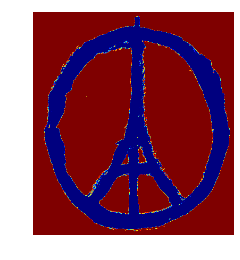

In [34]:
eiffelPeace_mask = np.array(Image.open(path.join('eiffelPeace_contrast.png')))
figEiffelPeace  = plt.figure(figsize = (4,4))  
plt.imshow(eiffelPeace_mask)
plt.axis("off")
plt.show()

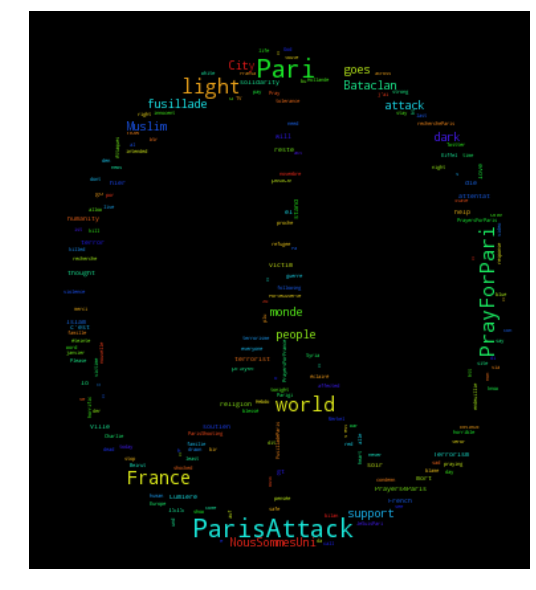

In [6]:
#This code is from this really excellent tutorial:
#http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html

# join tweets to a single string
words = ' '.join(tweets['text'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

#remove original search hashes
more_stopwords = {'#ParisAttacks', '#ParisAttack', '#Paris', 'ParisAttack', '#NousSommesUnis', 'NousSommesUnis', 'amp'}
frSTOPWORDS = get_stop_words('french')
STOPWORDS1 = STOPWORDS.union(more_stopwords)
STOPWORDS = STOPWORDS1.union(frSTOPWORDS)

#generate wordcloud with mask and store to file
eiffelPeace_mask = np.array(Image.open(path.join('eiffelPeace_contrast.png')))

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400,
                      mask = eiffelPeace_mask
            ).generate(no_urls_no_tags)


#plt.imshow(eiffelPeace_mask)
figEiffelPeaceWC  = plt.figure(figsize = (10,10))  
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('eiffelPeaceWC_1GB.png', dpi=300)
plt.show()

I like the image, but it's hard to see the actual words

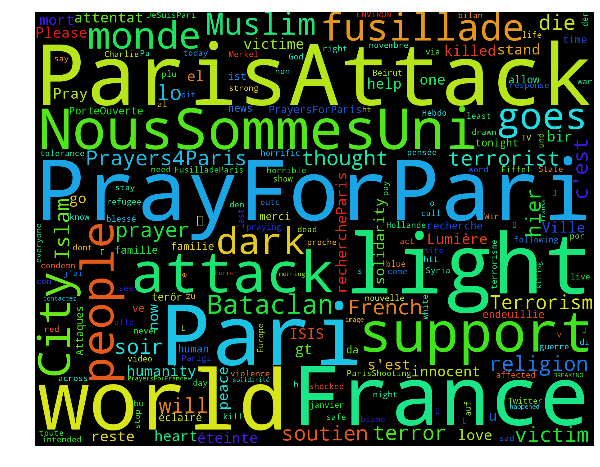

In [7]:
wordcloudNoMask = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400,
            ).generate(no_urls_no_tags)


#plt.imshow(eiffelPeace_mask)
figParisAttacks  = plt.figure(figsize = (10,10))
plt.imshow(wordcloudNoMask)
plt.axis("off")
plt.savefig('parisAttacksWC_1GB.png', dpi=300)
plt.show()

Better!

#Exploration of the data

In [8]:
print "Basic Information About Data:\n"
tweets.info()

print "\nSummary Stats of Numeric Fields:"
print "\tPolarity ranges from -1.0 - 1.0"
print "\tSubjectivity ranges from 0.0-1.0 (where 0.0 is very objective and 1.0 is very subjective)"
tweets.describe()

Basic Information About Data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190393 entries, 0 to 190392
Data columns (total 12 columns):
user_name       190393 non-null object
text            190393 non-null object
lang            190393 non-null object
country         2573 non-null object
place_name      2573 non-null object
full_name       2573 non-null object
time_zone       114152 non-null object
coordinates     2573 non-null object
messageTB       190393 non-null object
polarity        190393 non-null float64
sentiment       190393 non-null object
subjectivity    190393 non-null float64
dtypes: float64(2), object(10)
memory usage: 18.9+ MB

Summary Stats of Numeric Fields:
	Polarity ranges from -1.0 - 1.0
	Subjectivity ranges from 0.0-1.0 (where 0.0 is very objective and 1.0 is very subjective)


,polarity,subjectivity
count,190393.000000,190393.000000
mean,-0.007901,0.180560
std,0.242280,0.306010
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.366667
max,1.000000,1.000000


#How does this classifier work: how many "neutral" tweets are there?

In [9]:
print tweets.groupby('sentiment')['polarity'].count()

sentiment
negative     28308
neutral     135056
positive     27029
Name: polarity, dtype: int64


In [10]:
tweets_of_interest_polSub = tweets[(tweets.polarity == 0) & (tweets.subjectivity == 0.5)]
tweets_of_interest_sub = tweets[(tweets.subjectivity == 0.5)]

print 'Number of neutral tweets - subjectivity:', tweets_of_interest_sub.text.count()
print '\nNumber of neutral tweets - polarity & subjectivity:', tweets_of_interest_polSub.text.count()

Number of neutral tweets - subjectivity: 5285

Number of neutral tweets - polarity & subjectivity: 745


#What is the content of something classified as neutral?

In [12]:
tweets_of_interest_pol = tweets[(tweets.polarity == 0)]
tweets_of_interest_pol.messageTB.head(10).unique()

array([ TextBlob("RT @elise_vincent: Les vidéos amateurs des #attentats du 13 novembre à #Paris sont toutes là :  https://t.co/RB7BzFgWeb  @lemondefr"),
       TextBlob("RT @jayeshdewana12: #ParisAttacks #Paris #ParisShooting https://t.co/a1cj2r7hny"),
       TextBlob("RT @nayeem1211: With peace and prayers! #Porteouverte #ParisAttacks https://t.co/WhRvw1L0RB"),
       TextBlob("RT @fadig: From #Beirut to #Paris  شمعة للحياة https://t.co/KEjhLRrGw0"),
       TextBlob("on fini l'année comme on l'a commencer #prayforparis #ParisAttacks"),
       TextBlob("RT @ParisNoLimit: Quand le monde nous apporte son soutien #PrayForParis #ParisAttacks https://t.co/am1lTQEY9M"),
       TextBlob("RT @AnilKapoor: Horrified at the barbarism at display in the #ParisAttacks! No ideology can justify destruction of life. We stand with you …"),
       TextBlob("RT @EjmAlrai: #ISIS account recycling "#ISIS Message to France" and using the same hashtag #ParisAttacks https://t.co/i5Vz0xaOc4
No officia…"),
     

Ummm...something seems to be wrong with this classifier! It's only good for English. 

#What languages are being tweeted?

Total number of languages: 51


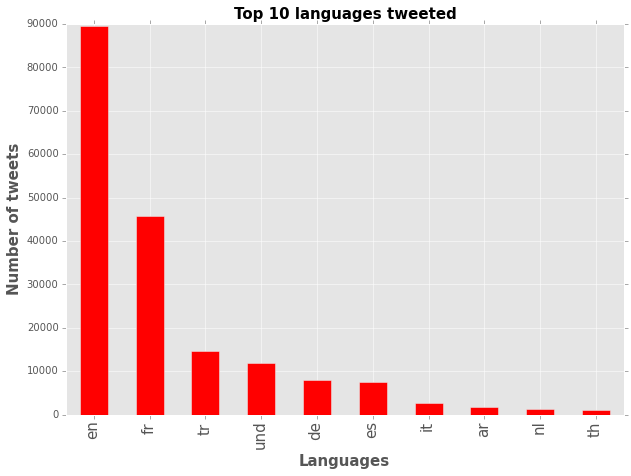

In [13]:
print 'Total number of languages:', tweets.lang.unique().size

plt.style.use('ggplot')

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(10,7))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of tweets' , fontsize=15, fontweight='bold')
ax.set_title('Top 10 languages tweeted', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='red')

#for language codes, submit a help request to Twitter:
#https://dev.twitter.com/rest/reference/get/help/languages

Let's take only the English tweets and see what happens.

In [14]:
english_tweets = tweets[tweets.lang == 'en']
print len(english_tweets)
english_tweets.describe()

89655


,polarity,subjectivity
count,89655.000000,89655.00000
mean,-0.002588,0.33681
std,0.321019,0.33620
min,-1.000000,0.00000
25%,-0.100000,0.00000
50%,0.000000,0.31250
75%,0.100000,0.57500
max,1.000000,1.00000


In [15]:
english_tweets_groupby = english_tweets.groupby(['sentiment']).text.count()
print english_tweets_groupby

sentiment
negative    25338
neutral     39151
positive    25166
Name: text, dtype: int64


Fairly even distribution of sentiment, mostly neutral.

#So what do English-language "Neutral", "Negative" and "Positive" tweets look like?

In [16]:
en_tweets_of_interest_pol_neu = english_tweets[(english_tweets.polarity == 0)]
print 'Example English tweets with NEUTRAL polarity:'
en_tweets_of_interest_pol_neu.messageTB.head(5).unique()

Example English tweets with NEUTRAL polarity:


array([ TextBlob("RT @nayeem1211: With peace and prayers! #Porteouverte #ParisAttacks https://t.co/WhRvw1L0RB"),
       TextBlob("RT @AnilKapoor: Horrified at the barbarism at display in the #ParisAttacks! No ideology can justify destruction of life. We stand with you …"),
       TextBlob("RT @EjmAlrai: #ISIS account recycling "#ISIS Message to France" and using the same hashtag #ParisAttacks https://t.co/i5Vz0xaOc4
No officia…"),
       TextBlob("Please help support Pray For #Paris, add a #Twibbon now! https://t.co/OIRFOcdgh5"),
       TextBlob("RT @moonnor27: Terrorism has no religion
Terrorism does not represent Islam
am Muslim stand with Paris #ParisAttacks
#Prayers4Paris https:/…")], dtype=object)

In [17]:
en_tweets_of_interest_pol_neg = english_tweets[(english_tweets.polarity == -1)]
print 'Example English tweets with NEGATIVE polarity:'
en_tweets_of_interest_pol_neg.messageTB.head(8).unique()

Example English tweets with NEGATIVE polarity:


array([ TextBlob("RT @MarkRuffalo: Don't allow this horrific act allow you to be drawn into the loss of your humanity or tolerance. That is the intended outc…"),
       TextBlob("RT @piersmorgan: Time for America, Russia, China, Europe &amp; Arab leaders to come together &amp; wipe out these evil Jihadists.      #paris"),
       TextBlob("So horrible what happened there! My deepest condolences for family and friends of the victims! #PrayForParis #Paris https://t.co/5rpKc6b7qn"),
       TextBlob("#ParisAttacks, my condolances to the victims fmly. whoever  is involved in the terrible attack should be severly punished by all countries")], dtype=object)

In [18]:
en_tweets_of_interest_pol_pos = english_tweets[(english_tweets.polarity == 1)]
print 'Example English tweets with POSITIVE polarity:'
en_tweets_of_interest_pol_pos.messageTB.head(8).unique()

Example English tweets with POSITIVE polarity:


array([ TextBlob("RT @Ukhti_Shariqa: Do most people realize !!
Their is no religion of terrorist!!
#ParisAttacks https://t.co/Bt1ZTgaYdz"),
       TextBlob("RT @AmyMek: To this day, "Mein Kampf" is a best seller in the Muslim World! 

#Paris #Muslims
#StopIslam https://t.co/3zSoAwiBxH")], dtype=object)

It seems like the classifier is having a tough time with these tweets. Some are sarcastic, and many have words that are positive (e.g.: sending love to Paris...) while the tone and actual sentiment is quite grim.  

This makes me want to dive into other metrics to classify natural language. This one is unsatisfying to me!! Very reminiscent of my work analyzing animal signals.

In [ ]:
"""
notes to myself - some future to-dos on text classification: 
    -try out training my own classification with these data rather than using their movie-review corpus
    -test out TextBlob translation features to be able to include more languages
    -find other metrics for understanding text content
    -look into ways to handle sarcasm
    -study up on how emoticons are handled
"""

#What can we say about the geography of the tweets? 

##Another chart: the top 5 countries the tweets are from

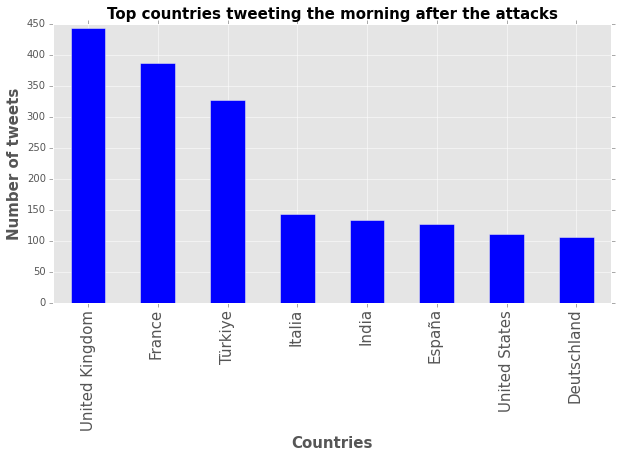

In [26]:
tweets_by_country = tweets['country'].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of tweets' , fontsize=15, fontweight='bold')
ax.set_title('Top countries tweeting the morning after the attacks', fontsize=15, fontweight='bold')
tweets_by_country[:8].plot(ax=ax, kind='bar', color='blue')

In [6]:
tweets_country_un = tweets.country.unique().size
tweets_country = tweets.country.count()
tweet_nu = len(tweets_data)

#print 'Total number of countries represented is: {0}'.format(tweets_country_un)
#print '\nTotal number of users with location enabled: {0}'.format(tweets_country)
#print '\nTotal number of tweets is: {0}'.format(tweet_nu)

tweets_country_percent = (float(tweets_country) / len(tweets_data))*100
tweets_country_percent2 = round(tweets_country_percent, 2)

print  "\nOnly {0} % of tweeters have country/geotagging specified.".format(tweets_country_percent2)


Only 1.35 % of tweeters have country/geotagging specified.


## To be able to look the geography of at all of the data, here I use the "User" field "Time Zone" to get a roungh idea of where the tweets are coming from: 

In [29]:
tweets_timeZ = tweets.time_zone.unique().size
print '{0} time zones are represented in the data set.'.format(tweets_timeZ)

225 time zones are represented in the data set.


This is because many of the values in "time_zone" are actually cities, which we could use to create a more comprehensive map the data than you could using the country or coordinate information (for a future project).

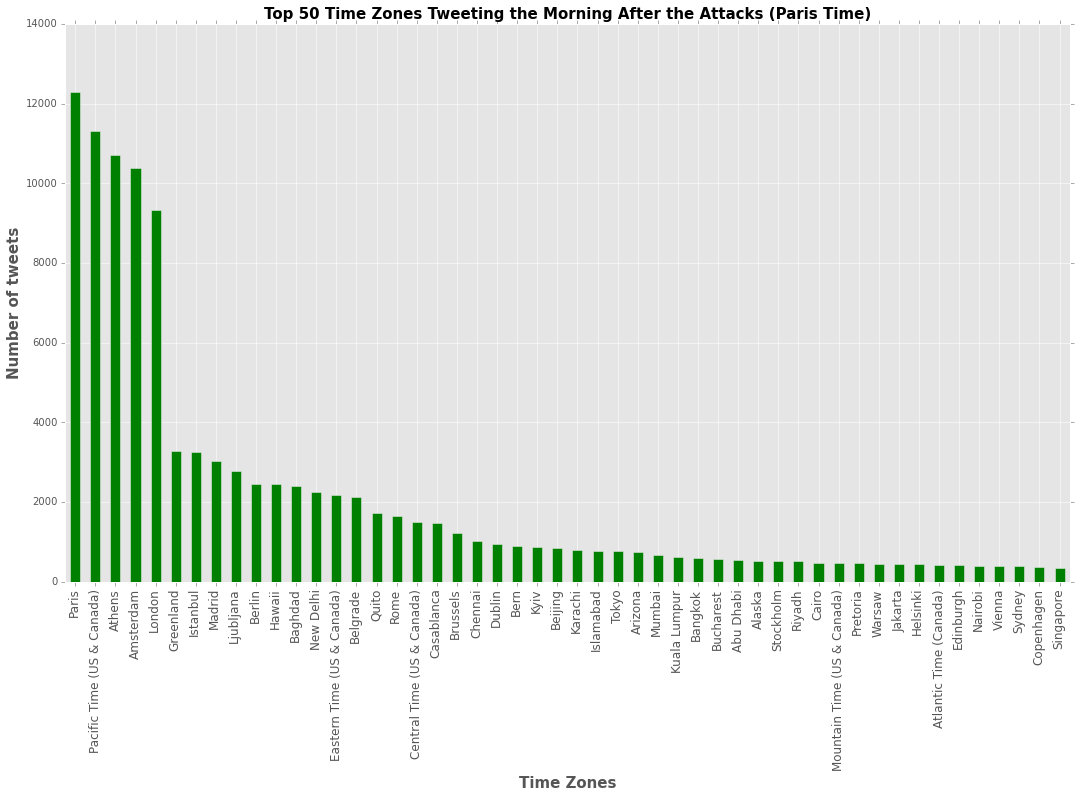

In [28]:
tz = tweets['time_zone'].value_counts()

fig, ax = plt.subplots(figsize=(18, 10))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Zones', fontsize=15, fontweight='bold')
ax.set_ylabel('Number of tweets' , fontsize=15, fontweight='bold')
ax.set_title('Top 50 Time Zones Tweeting the Morning After the Attacks (Paris Time)', fontsize=15, fontweight='bold')
tz[:50].plot(ax=ax, kind='bar', color='green')

plt.savefig('path/file.png')

They are from all over the world!

#Fodder for a future map...
##Sentiment by location (using time zone as a proxy)

In [30]:
"""
It would be great to plot the distribution of tweets on a map in the future,
could do # of tweets/time zone and also sentiment of the tweets/time zone.
I'd need to translate these time zones into the time zone code from 
an existing shapefile (such as tz_world_mp.shp).
"""

polarityTZ = english_tweets.groupby('time_zone')['polarity'].mean()
print polarityTZ

#note to my future self: output this to csv, edit the time_zones to coordinate with the shapefile, 
#map this on a worldTZ map. 

time_zone
Abu Dhabi                        -0.006495
Adelaide                          0.024597
Africa/Cairo                     -0.212500
Africa/Johannesburg               0.208333
Africa/Lagos                      0.058523
Africa/Nairobi                   -0.124594
Alaska                           -0.038298
Almaty                            0.066687
America/Anchorage                 0.000000
America/Argentina/Buenos_Aires    0.232500
America/Bahia_Banderas            0.000000
America/Boise                     0.300000
America/Caracas                   0.000000
America/Chicago                   0.019722
America/Denver                    0.285714
America/Los_Angeles               0.120995
America/New_York                 -0.027344
America/Regina                   -0.050000
America/Sao_Paulo                 0.318182
America/Vancouver                 0.033929
Amsterdam                        -0.020999
Arizona                          -0.006518
Asia/Aden                         0.000000
A

##Tweets by time zone

In [33]:
time_zone_groupby = tweets.groupby(['time_zone'])
print time_zone_groupby.size()

time_zone
Abu Dhabi                           538
Adelaide                             66
Africa/Cairo                          5
Africa/Douala                         1
Africa/Johannesburg                   6
Africa/Lagos                          4
Africa/Nairobi                       15
Alaska                              533
Almaty                               57
America/Anchorage                     1
America/Argentina/Buenos_Aires        3
America/Asuncion                      1
America/Bahia_Banderas                2
America/Boise                         1
America/Caracas                       1
America/Chicago                      18
America/Chihuahua                     1
America/Denver                        1
America/Los_Angeles                  40
America/Mexico_City                   1
America/New_York                     41
America/Regina                        2
America/Sao_Paulo                     2
America/Vancouver                     6
Amsterdam                     